In [355]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import seaborn as sns
import mplleaflet as mpl
import geopandas
import matplotlib.pyplot as plt

In [356]:
dataset = pd.read_csv('GlobalLandTemperaturesByCountry.csv', header=None, low_memory=False)

In [357]:
print(dataset.shape)

(577463, 4)


In [358]:
dataset.columns = ['dt','AverageTemperature','AverageTemperatureUncertainty','Country']

In [359]:
dataset.isnull().sum(axis = 0)

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [360]:
dataset.drop([0], inplace=True)

In [361]:
dataset

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1,1743-11-01,4.3839999999999995,2.294,Åland
2,1743-12-01,NaN,NaN,Åland
3,1744-01-01,NaN,NaN,Åland
4,1744-02-01,NaN,NaN,Åland
5,1744-03-01,NaN,NaN,Åland
6,1744-04-01,1.53,4.68,Åland
7,1744-05-01,6.702000000000001,1.789,Åland
8,1744-06-01,11.609000000000002,1.577,Åland
9,1744-07-01,15.342,1.41,Åland
10,1744-08-01,NaN,NaN,Åland


In [362]:
dataset.describe(include='all')
dataset[]
#Como preencher os dados faltantes?
#Preencher com a média do país naquele mes, ou com a média entre o mes anterior e o próximo mês, ou utilizar média do ano anterior?

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
count,577462,544811,545550,577462
unique,3239,77219,8979,243
top,1995-09-01,26.864,0.28300000000000003,Bosnia And Herzegovina
freq,243,80,935,3239


In [363]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577462 entries, 1 to 577462
Data columns (total 4 columns):
dt                               577462 non-null object
AverageTemperature               544811 non-null object
AverageTemperatureUncertainty    545550 non-null object
Country                          577462 non-null object
dtypes: object(4)
memory usage: 22.0+ MB


In [364]:
dataset['Country'] = dataset['Country'].astype('str')

In [365]:
dataset['AverageTemperatureUncertainty'] = dataset['AverageTemperatureUncertainty'].astype('float64')

In [366]:
dataset['AverageTemperature'] = dataset['AverageTemperature'].astype('float64')

In [367]:
dataset['dt'] = dataset['dt'].astype('datetime64')

In [368]:
for i in dataset['Country'].unique():
        print('%s:' % (i))
        print('\t Média = %.2f' % dataset[dataset['Country'] == i]['AverageTemperature'].mean(skipna=True))
        print('\t Desvio Padrão = %.2f' % (dataset[dataset['Country'] == i]['AverageTemperature']).std(skipna=True))
        print('\t Mínimo = %.2f' % (dataset[dataset['Country'] == i]['AverageTemperature']).min(skipna=True))
        print('\t Máximo = %.2f' % (dataset[dataset['Country'] == i]['AverageTemperature']).max(skipna=True))

Åland:
	 Média = 5.29
	 Desvio Padrão = 7.17
	 Mínimo = -12.87
	 Máximo = 19.97
Afghanistan:
	 Média = 14.05
	 Desvio Padrão = 9.23
	 Mínimo = -4.55
	 Máximo = 28.53
Africa:
	 Média = 24.07
	 Desvio Padrão = 1.77
	 Mínimo = 19.52
	 Máximo = 27.13
Albania:
	 Média = 12.61
	 Desvio Padrão = 6.99
	 Mínimo = -2.05
	 Máximo = 25.84
Algeria:
	 Média = 22.99
	 Desvio Padrão = 7.71
	 Mínimo = 9.53
	 Máximo = 35.83
American Samoa:
	 Média = 26.61
	 Desvio Padrão = 0.61
	 Mínimo = 24.71
	 Máximo = 28.54
Andorra:
	 Média = 11.20
	 Desvio Padrão = 5.93
	 Mínimo = -0.92
	 Máximo = 24.31
Angola:
	 Média = 21.82
	 Desvio Padrão = 1.72
	 Mínimo = 17.23
	 Máximo = 25.17
Anguilla:
	 Média = 26.61
	 Desvio Padrão = 1.36
	 Mínimo = 23.24
	 Máximo = 29.64
Antarctica:
	 Média = nan
	 Desvio Padrão = nan
	 Mínimo = nan
	 Máximo = nan
Antigua And Barbuda:
	 Média = 26.44
	 Desvio Padrão = 1.29
	 Mínimo = 23.16
	 Máximo = 29.33
Argentina:
	 Média = 14.62
	 Desvio Padrão = 4.85
	 Mínimo = 4.80
	 Máximo = 23.29


	 Desvio Padrão = 0.75
	 Mínimo = 23.47
	 Máximo = 28.26
Haiti:
	 Média = 26.30
	 Desvio Padrão = 1.38
	 Mínimo = 22.60
	 Máximo = 29.43
Heard Island And Mcdonald Islands:
	 Média = 2.56
	 Desvio Padrão = 1.87
	 Mínimo = -1.21
	 Máximo = 6.74
Honduras:
	 Média = 24.70
	 Desvio Padrão = 1.48
	 Mínimo = 19.98
	 Máximo = 28.31
Hong Kong:
	 Média = 22.66
	 Desvio Padrão = 4.83
	 Mínimo = 11.62
	 Máximo = 29.68
Hungary:
	 Média = 9.72
	 Desvio Padrão = 8.32
	 Mínimo = -9.82
	 Máximo = 24.93
Iceland:
	 Média = 1.41
	 Desvio Padrão = 4.67
	 Mínimo = -10.01
	 Máximo = 11.89
India:
	 Média = 23.87
	 Desvio Padrão = 4.33
	 Mínimo = 14.39
	 Máximo = 31.33
Indonesia:
	 Média = 25.68
	 Desvio Padrão = 0.52
	 Mínimo = 23.73
	 Máximo = 27.48
Iran:
	 Média = 17.61
	 Desvio Padrão = 8.56
	 Mínimo = -0.01
	 Máximo = 31.65
Iraq:
	 Média = 21.78
	 Desvio Padrão = 9.19
	 Mínimo = 3.84
	 Máximo = 37.40
Ireland:
	 Média = 9.42
	 Desvio Padrão = 3.80
	 Mínimo = 0.27
	 Máximo = 18.09
Isle Of Man:
	 Média = 9.3

	 Média = 26.74
	 Desvio Padrão = 0.82
	 Mínimo = 22.61
	 Máximo = 29.58
Sierra Leone:
	 Média = 26.02
	 Desvio Padrão = 1.18
	 Mínimo = 21.95
	 Máximo = 29.55
Singapore:
	 Média = 26.52
	 Desvio Padrão = 0.74
	 Mínimo = 24.03
	 Máximo = 28.88
Sint Maarten:
	 Média = 26.61
	 Desvio Padrão = 1.36
	 Mínimo = 23.24
	 Máximo = 29.64
Slovakia:
	 Média = 7.53
	 Desvio Padrão = 7.91
	 Mínimo = -11.67
	 Máximo = 22.16
Slovenia:
	 Média = 9.66
	 Desvio Padrão = 7.51
	 Mínimo = -7.15
	 Máximo = 24.02
Solomon Islands:
	 Média = 26.63
	 Desvio Padrão = 0.58
	 Mínimo = 24.18
	 Máximo = 28.28
Somalia:
	 Média = 26.88
	 Desvio Padrão = 1.18
	 Mínimo = 23.72
	 Máximo = 29.59
South Africa:
	 Média = 17.27
	 Desvio Padrão = 4.26
	 Mínimo = 8.53
	 Máximo = 24.65
South America:
	 Média = 21.82
	 Desvio Padrão = 1.57
	 Mínimo = 18.05
	 Máximo = 24.82
South Georgia And The South Sandwich Isla:
	 Média = 1.40
	 Desvio Padrão = 2.52
	 Mínimo = -5.47
	 Máximo = 6.93
South Korea:
	 Média = 11.85
	 Desvio Padrão

Covariancia:


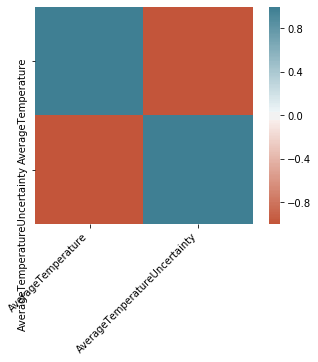

In [369]:
print('Covariancia:')

cov = dataset.cov()
ax = sns.heatmap(
    cov, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Correlação:


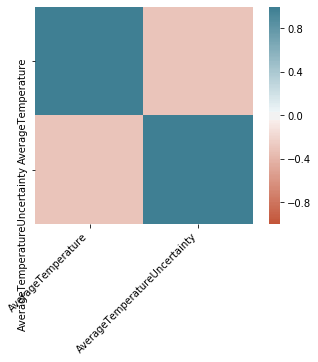

In [370]:
print('Correlação:')


corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

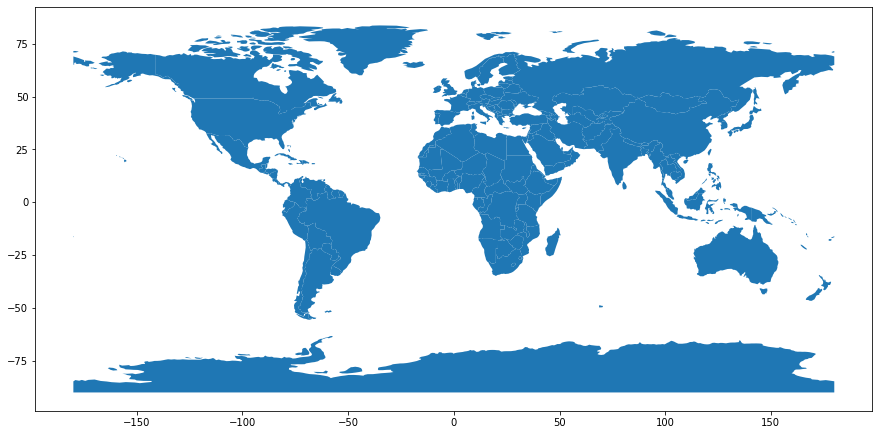

In [371]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
mundo = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=[15,15]);

In [372]:
world.columns = ['pop_est','continent','Country','iso_a3','gdp_md_est','geometry']
mundo.columns = ['pop_est','continent','Country','iso_a3','gdp_md_est','geometry']

In [373]:
world = pd.merge(world, dataset)

In [374]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 368246 entries, 0 to 368245
Data columns (total 9 columns):
pop_est                          368246 non-null int64
continent                        368246 non-null object
Country                          368246 non-null object
iso_a3                           368246 non-null object
gdp_md_est                       368246 non-null float64
geometry                         368246 non-null geometry
dt                               368246 non-null datetime64[ns]
AverageTemperature               350422 non-null float64
AverageTemperatureUncertainty    351161 non-null float64
dtypes: datetime64[ns](1), float64(3), geometry(1), int64(1), object(3)
memory usage: 28.1+ MB


In [375]:
world.isnull().sum(axis = 0)

pop_est                              0
continent                            0
Country                              0
iso_a3                               0
gdp_md_est                           0
geometry                             0
dt                                   0
AverageTemperature               17824
AverageTemperatureUncertainty    17085
dtype: int64

In [376]:
print(world['Country'].unique())

['Fiji' 'Tanzania' 'Canada' 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea'
 'Indonesia' 'Argentina' 'Chile' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Russia' 'Bahamas' 'Norway' 'Greenland' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' 'Guinea' 'Liberia'
 'Sierra Leone' 'Burkina Faso' 'Congo' 'Gabon' 'Zambia' 'Malawi'
 'Mozambique' 'Angola' 'Burundi' 'Israel' 'Lebanon' 'Madagascar' 'Gambia'
 'Tunisia' 'Algeria' 'Jordan' 'United Arab Emirates' 'Qatar' 'Kuwait'
 'Iraq' 'Oman' 'Cambodia' 'Thailand' 'Laos' 'Vietnam' 'North Korea'
 'South Korea' 'Mongolia' 'India' 'Bangladesh' 'Bhutan' 'Nepal' 'Pakistan'
 'Afghanistan' 'Tajikistan' 'Kyrgyzstan' 'Turkmenistan' 'Iran' 'Syria'
 'Armeni

In [377]:
temps = []
for i in world['Country'].unique():
    temp = world[world['Country'] == i]['AverageTemperature'].sum()
    quant = (world[world['Country'] == i]['AverageTemperature'].notnull()).sum()
    media = temp/quant
    temps.append(media)


/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [378]:
temps

[25.038671779141108,
 22.34791097178684,
 -5.216658945686901,
 5.202144758735441,
 12.278015938069215,
 24.450801898734177,
 25.684483767961684,
 14.621194210526316,
 9.383473684210525,
 26.877085169743896,
 24.102428231089934,
 27.09335942857143,
 27.120466282420747,
 26.295837740923353,
 -5.521881912681913,
 25.12822004008016,
 0.09580385344283004,
 -18.58745804195804,
 17.27098291510945,
 13.726681793913508,
 20.56755804195804,
 17.149306774809162,
 24.699255545286505,
 20.87723052631579,
 19.935974230044,
 24.716870967741936,
 26.29162063808574,
 25.61578443420379,
 25.957508780036967,
 24.69554799459216,
 24.906704545454545,
 23.111650494159928,
 25.052099776286354,
 25.025685522531163,
 25.930920115495667,
 26.17166313763234,
 12.772445672773214,
 21.869970347003154,
 25.451961667465262,
 26.09633956386293,
 25.40742638706859,
 21.117547246376812,
 21.87929669156884,
 20.484495197438637,
 27.967375,
 28.441976570820025,
 27.620255504352276,
 27.17199943181818,
 27.458972540045767

In [379]:
temps = pd.Series(temps)
mundo = mundo.merge(temps.rename('temperatures'), left_index=True, right_index=True)

In [380]:
mundo

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry,temperatures
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",25.038672
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",22.347911
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",-5.216659
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",5.202145
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12.278016
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",24.450802
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",25.684484
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",14.621194
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",9.383474
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",26.877085


/home/diogo/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


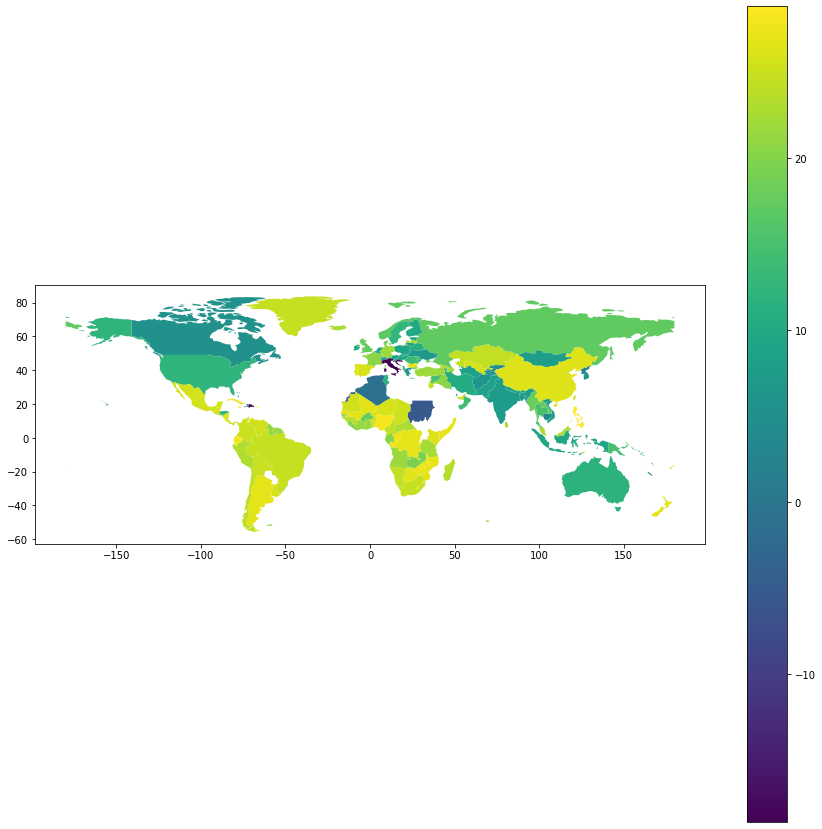

In [381]:
mundo.plot(column='temperatures', legend=True, figsize=[15,15]);

In [398]:
ultimatemp = []
primeiratemp = []
for i in world['Country'].unique():
    primeiratemp.append(world.loc[world[world['Country']==i]['dt'].idxmin(), 'AverageTemperature'])
    ultimatemp.append(world.loc[world[world['Country']==i]['dt'].idxmax(), 'AverageTemperature'])
ultimatemp = pd.Series(ultimatemp)
primeiratemp = pd.Series(primeiratemp)
print(primeiratemp)
print(ultimatemp)

0      26.341
1      22.054
2       5.257
3     -14.532
4      -5.145
5      25.347
6      25.915
7      10.745
8       7.152
9      23.952
10     23.571
11     22.126
12     21.544
13     24.987
14    -27.114
15     22.216
16     -3.503
17    -29.921
18     21.516
19     18.073
20     15.810
21     23.126
22     24.935
23     19.321
24     19.725
25     25.010
26     26.673
27     25.364
28     25.207
29     23.212
        ...  
123    16.684
124    14.967
125     9.538
126   -29.446
127     7.086
128    -1.794
129    12.001
130     4.566
131    24.219
132    25.263
133     5.668
134    -3.571
135     3.697
136    22.468
137    -1.100
138    26.886
139    19.886
140    16.247
141       NaN
142    19.780
143    11.298
144    13.264
145    26.422
146    20.703
147    23.748
148    22.498
149    18.112
150     5.431
151     5.151
152     5.645
Length: 153, dtype: float64
0         NaN
1         NaN
2       7.922
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8     

In [383]:
mundo = mundo.merge(primeiratemp.rename('primeiratemperatura'), left_index=True, right_index=True)
mundo = mundo.merge(ultimatemp.rename('ultimatemperatura'), left_index=True, right_index=True)

In [384]:
mundo

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry,temperatures,primeiratemperatura,ultimatemperatura
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",25.038672,26.341,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",22.347911,22.054,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",-5.216659,5.257,7.922
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",5.202145,-14.532,NaN
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12.278016,-5.145,NaN
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",24.450802,25.347,NaN
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",25.684484,25.915,NaN
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",14.621194,10.745,NaN
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",9.383474,7.152,NaN
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",26.877085,23.952,NaN


/home/diogo/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


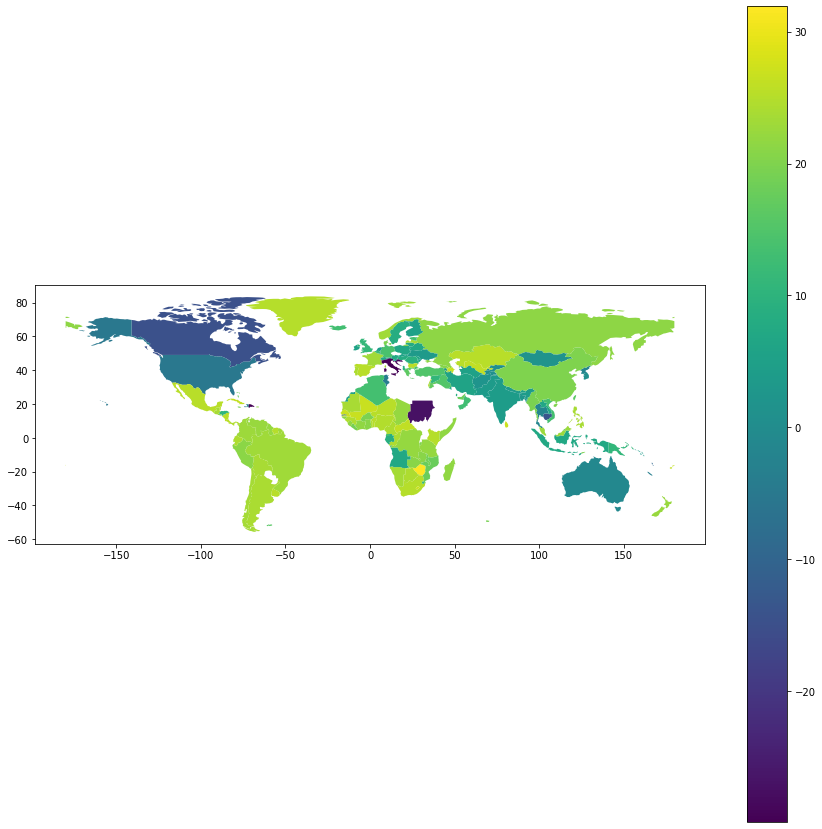

In [385]:
mundo.plot(column='primeiratemperatura', legend=True, figsize=[15,15]);

/home/diogo/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


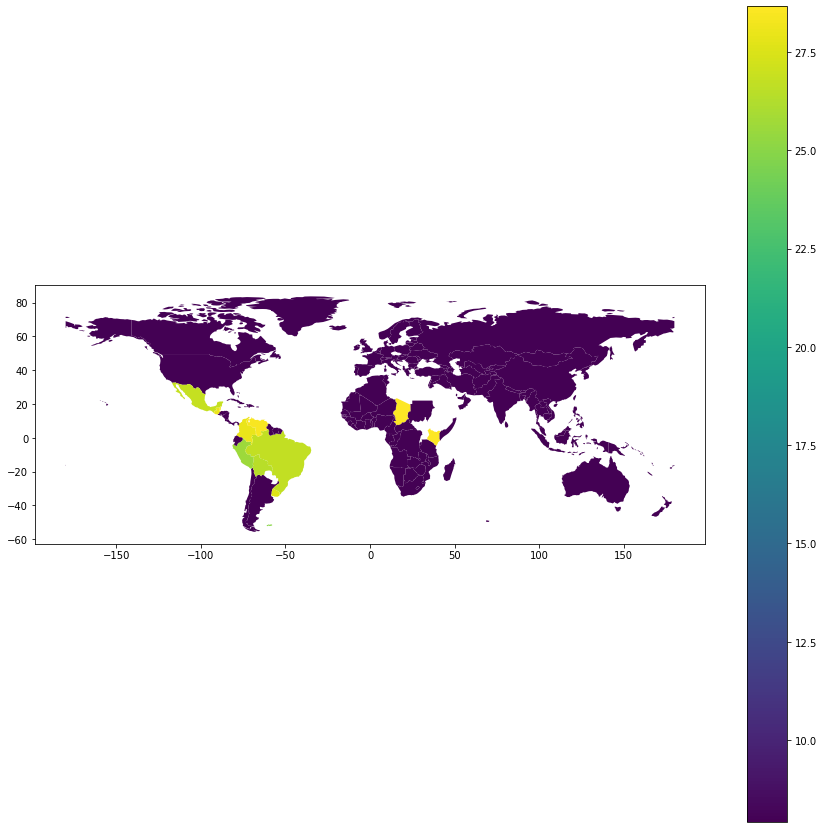

In [386]:
mundo.plot(column='ultimatemperatura', legend=True, figsize=[15,15]);